Imports

In [11]:
from dag_blockchain import DAGBlockchain
from blockchain_utils import BlockchainUtils
import block
from pubsub import pub
from node import Node
from transaction import Transaction
from sensor_transaction import SensorTransaction
from transaction_pool import TransactionPool
from wallet import Wallet
from Crypto.PublicKey import RSA
import pprint
import random
import time


Creating MWSN Simulation

In [12]:
print('starting MWSN')

MAX_NODES = 9999
num_nodes = 80
num_clusters = 16
forging_interval = 10  # Time interval.  10 units of time
nodes = []  # list of all nodes
blockchain_dimensions = 4
genesis_node_id = 1 # int(num_nodes/2)

then = time.time()
for i in range(2):
    new_node = Node(i+1, 0, 1)
    new_node.start_listener('c0')
    nodes.append(new_node)
now = time.time()-then
print(f'genesis block init time @ {num_nodes} nodes: {now}')

starting MWSN
genesis block init time @ 80 nodes: 4.00016450881958


Creating DAG Blockchain

block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
block add successful
dict_items([(1, <pydag.DAGNode object at 0x000001F05DC47370>), (10, <pydag.DAGNode object at 0x000001F05DB88490>), (11, <pydag.DAGNode object at 0x000001F05DB75BE0>), (12, <pydag.DAGNode object at 0x000001F05B770790>), (13, <pydag.DAGNode object at 0x000001F05DC2A520>), (14, <pydag.DAGNode object at 0x000001F05DCCCF10>), (15, <pydag.DAGNode object at 0x000001F05DC2A9A0>), (16, <pydag.DAGNode object at 0x000001F05DC2A6D0>), (17, <pydag.DAGNode object at 0x000001F05DCE2190>), (20, <pydag.DAGNode object at 0x000001F05DB62DC0>), (21, <pydag.DAGNode object at 0x000001F05B8347F0>), (22, <pydag.DAGNode object at 0x000001F

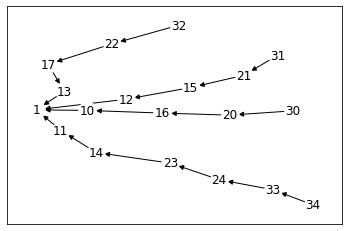

In [13]:
# creating dag_blockchain and adding genesis block
genesis_forger = nodes[genesis_node_id-1].wallet.public_key_string()
dag_blockchain = DAGBlockchain(blockchain_dimensions, genesis_node_id, genesis_forger)    

# adding blocks
block49 = block.Block([], 10, 25, 25, genesis_forger)
block51 = block.Block([], 11, 25, 75, genesis_forger)
block52 = block.Block([], 12, 75, 75, genesis_forger)
block4 = block.Block([], 13, 75, 25, genesis_forger)
block5 = block.Block([], 14, 5, 80, genesis_forger)
block6 = block.Block([], 15, 60, 60, genesis_forger)
block7 = block.Block([], 16, 40, 10, genesis_forger)
block8 = block.Block([], 17, 70, 20, genesis_forger)

dag_blockchain.add_block(block49)
dag_blockchain.add_block(block51)
dag_blockchain.add_block(block52)
dag_blockchain.add_block(block4)
dag_blockchain.add_block(block5)
dag_blockchain.add_block(block6)
dag_blockchain.add_block(block7)
dag_blockchain.add_block(block8)

# creating and adding for dag_blockchain2
genesis_forger2 = nodes[genesis_node_id-2].wallet.public_key_string()
dag_blockchain2 = DAGBlockchain(blockchain_dimensions, 2, genesis_forger2)

block20 = block.Block([], 20, 20, 30, genesis_forger2)
block21 = block.Block([], 21, 60, 60, genesis_forger2)
block22 = block.Block([], 22, 60, 30, genesis_forger2)
block23 = block.Block([], 23, 40, 65, genesis_forger2)
block24 = block.Block([], 24, 45, 66, genesis_forger2)

dag_blockchain2.add_block(block20)
dag_blockchain2.add_block(block21)
dag_blockchain2.add_block(block22)
dag_blockchain2.add_block(block23)
dag_blockchain2.add_block(block24)

dag_blockchain.merge(dag_blockchain2)

genesis_forger3 = nodes[genesis_node_id-1].wallet.public_key_string()
dag_blockchain3 = DAGBlockchain(blockchain_dimensions, -1, genesis_forger3)

block20 = block.Block([], 30, 20, 30, genesis_forger2)
block21 = block.Block([], 31, 60, 60, genesis_forger2)
block22 = block.Block([], 32, 60, 30, genesis_forger2)
block23 = block.Block([], 33, 40, 65, genesis_forger2)
block24 = block.Block([], 34, 45, 66, genesis_forger2)

dag_blockchain3.add_block(block20)
dag_blockchain3.add_block(block21)
dag_blockchain3.add_block(block22)
dag_blockchain3.add_block(block23)
dag_blockchain3.add_block(block24)
dag_blockchain.merge(dag_blockchain3)

print(dag_blockchain.dag.graph.items())
print(dag_blockchain.dag.predecessors(genesis_node_id))
print(dag_blockchain.dag.downstream(genesis_node_id))
print(dag_blockchain.dag.all_downstreams2(genesis_node_id))
print(dag_blockchain.dag.all_leaves(dag_blockchain.dag.graph))
print(dag_blockchain.dag.ind_nodes(dag_blockchain.dag.graph))
print(dag_blockchain.dag.all_downstreams2(block8.node_id))
print(dag_blockchain.dag.merkle_hash(block8))

dag_blockchain.visualize("")